The k-means algorithm
---

In [24]:
import pandas as pd
import numpy as np
import os

Exercise - Chigago gambling crimes
---

The city of Chicago disposes of 8 police patrols to fight gambling crimes. They want to assign each patrol to an area of Chicago where there is historically a lot of gambling crimes.

> **Exercise**: Load the gambling crimes data. Create an `X` array with the `Longitude` and the `Latitude` variables (drop the other ones). Create a map of the gambling crimes using these two variables. Find eight centers of gamblings crimes using *k*-means. Plot each cluster with a different color and mark their centers (the centroids).

In [25]:
data_df=pd.read_csv(os.path.join('data','chicago-crimes.csv'))
data_df.head(3)

,Case Number,Block,Description,Location Description,Arrest,Year,Latitude,Longitude
0,G360170,027XX N HOYNE AV,GAME/DICE,CHA HALLWAY/STAIRWELL/ELEVATOR,True,2001,41.932,-87.679
1,HV362360,105XX S LAFAYETTE AVE,GAME/DICE,SIDEWALK,True,2012,41.703,-87.625
2,HX330175,021XX E 71ST ST,GAME/DICE,GROCERY FOOD STORE,True,2014,41.766,-87.574


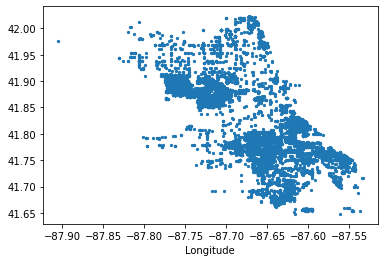

In [29]:
import matplotlib.pyplot as plt

# plot the lat/long from dataset
plt.scatter(data_df['Longitude'], data_df['Latitude'], s=5)
plt.xlabel('Longitude')
plt.show()

In [30]:
# Let's get X values as Latitude and Longitude

X=data_df[['Longitude', 'Latitude']].values

from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(
    n_clusters=8,
    random_state=0 # Fix results
)

kmeans.fit(X)

KMeans(random_state=0)

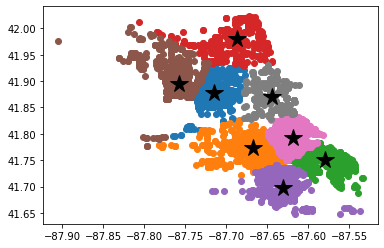

In [31]:
# Plot clusters
for cluster in [0, 1, 2, 3, 4, 5, 6, 7]:
    # Get points in this cluster
    idx = (kmeans.labels_ == cluster)

    # Plot points
    plt.scatter(
        X[idx, 0], # Third column: petal length
        X[idx, 1], # Fourth column: petal width
        label='cluster {}'.format(cluster)
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker='*', color='black', markersize=18)

Challenge - Image compression
---

> **Exercise**: Load the `pepper.jpg` image. Apply *k*-means to the image pixels to extract a palette of 3, 5 or 10 colors. Then re-draw the image using this new palette.

In [32]:
from PIL import Image

pillow_img=Image.open(os.path.join('data','pepper.jpg'))


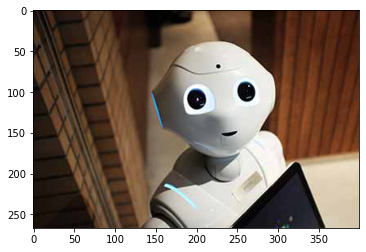

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# convert to array
# Convert into Numpy array
img = np.array(pillow_img)

# Plot the image
plt.imshow(img)
plt.show()

# reshape img
img.reshape(-1, 3)

# Create k-means object
kmeans = KMeans(
    n_clusters=5,
    random_state=0 # Fix results
)

kmeans.fit(X)


In [40]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}